### 필요한 경우에 실행

In [ ]:
# !cd ~/work/AIFFEL_quest_rs/Exploration/Ex05

In [ ]:
# !cd ~/work/AIFFEL_quest_rs/Exploration/Ex05

In [ ]:
# !sudo apt update
# !sudo apt install openjdk-17-jdk -y
# !echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
# !source ~/.bashrc

In [ ]:
# !pip install konlpy
# !pip install nltk==3.6.7
# !pip install gensim==4.3.2
# !pip install scipy==1.12.0 numpy==1.26.2

In [ ]:
# !cd ~/work/AIFFEL_quest_rs/Exploration/Ex05
# !python -m gensim.scripts.word2vec2tensor --input ~/work/AIFFEL_quest_rs/Exploration/Ex05/w2v --output ~/work/AIFFEL_quest_rs/Exploration/Ex05/w2v
# !ls ~/work/AIFFEL_quest_rs/Exploration/Ex05/

In [ ]:
# !mkdir -p ~/work/AIFFEL_quest_rs/Exploration/Ex05/weat/data
# !ln -s ~/data/* ~/work/AIFFEL_quest_rs/Exploration/Ex05/weat/data/
# !unzip ~/work/AIFFEL_quest_rs/Exploration/Ex05/synopsis.zip -d ~/work/AIFFEL_quest_rs/Exploration/Ex05/weat/data/

---

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [4]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']

genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
              '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']


In [ ]:
# data_dir = os.path.join(os.getenv("HOME"), "work/Exploration/Ex05/weat/data")

In [ ]:
data_dir = "./synopsis"
gen_txt = 'synopsis_gen.txt'

In [ ]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

In [6]:
# 약 10분정도 걸립니다.
genre = []

for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [7]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b


In [8]:
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

In [10]:
print(len(genre))

21


In [11]:
tokenized_genre = [doc.split() for doc in genre]

In [12]:
print(f"문서 개수: {len(tokenized_genre)}") # 결과: 21 (정확도:높음)
print(f"첫 번째 문서의 단어 수: {len(tokenized_genre[0])}") 
print(f"첫 번째 문서의 일부 단어: {tokenized_genre[0][:5]}")

문서 개수: 21
첫 번째 문서의 단어 수: 21712
첫 번째 문서의 일부 단어: ['시간', '지명', '알', '수', '한국']


In [13]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(sentences=tokenized_genre, vector_size=100, window=5, min_count=3, sg=0)

# Gensim 3.X 에서는 아래와 같이 생성합니다.
# model = Word2Vec(genre, size=100, window=5, min_count=3, sg=0)

In [14]:
model.wv.most_similar(positive=['영화'])

[('지하철', 0.9991676807403564),
 ('소개', 0.9989392161369324),
 ('한국', 0.9987677335739136),
 ('디지털', 0.9987289905548096),
 ('작', 0.9986586570739746),
 ('공사', 0.9983816146850586),
 ('작품', 0.998263955116272),
 ('환경', 0.998259425163269),
 ('대전', 0.9981630444526672),
 ('유럽', 0.9981233477592468)]

In [15]:
model.wv.most_similar(positive=['사랑'])

[('그', 0.9990591406822205),
 ('모든', 0.9984219670295715),
 ('그녀', 0.9983696341514587),
 ('두', 0.998194694519043),
 ('집', 0.9981123208999634),
 ('자신', 0.9979474544525146),
 ('사람', 0.9977399706840515),
 ('둘', 0.9977098703384399),
 ('서로', 0.9971891641616821),
 ('하나', 0.9971534609794617)]

In [16]:
model.wv.most_similar(positive=['연극'])

[('관', 0.9988107085227966),
 ('촬영', 0.998772144317627),
 ('연기', 0.9987612962722778),
 ('뉴욕', 0.9987611174583435),
 ('소설', 0.9987454414367676),
 ('대학', 0.9987355470657349),
 ('음악', 0.9987313151359558),
 ('탄생', 0.9987306594848633),
 ('영국', 0.9987253546714783),
 ('액션', 0.9987210035324097)]

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [18]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])

24574
여권


In [20]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 프롤, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 사람, 운명, 최고, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 태구, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시

In [ ]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [30]:
target_X_words = [vectorizer.get_feature_names_out()[idx] for idx, val in w[0][:15] if vectorizer.get_feature_names_out()[idx] in model.wv]
target_Y_words = [vectorizer.get_feature_names_out()[idx] for idx, val in w[1][:15] if vectorizer.get_feature_names_out()[idx] in model.wv]

X = np.array([model.wv[word] for word in target_X_words])
Y = np.array([model.wv[word] for word in target_Y_words])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)


In [31]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 0.58134556
SF 공연 0.31556618
SF 공포(호러) -0.57353985
SF 기타 0.5756028
SF 다큐멘터리 0.5662198
SF 드라마 0.5568534
SF 멜로로맨스 -0.56605566
SF 뮤지컬 0.49773055
SF 미스터리 -0.5480621
SF 범죄 -0.5492449
SF 사극 0.19471733
SF 서부극(웨스턴) 0.31282714
SF 성인물(에로) -0.12358599
SF 스릴러 -0.55850697
SF 애니메이션 0.57301176
SF 액션 -0.51426214
SF 어드벤처 0.33506876
SF 전쟁 0.5776092
SF 코미디 0.4712855
SF 판타지 0.53537804
가족 공연 -0.43343526
가족 공포(호러) -0.5802699
가족 기타 0.55744326
가족 다큐멘터리 0.51361847
가족 드라마 -0.3659991
가족 멜로로맨스 -0.5785804
가족 뮤지컬 0.2624197
가족 미스터리 -0.5785123
가족 범죄 -0.579709
가족 사극 -0.48580447
가족 서부극(웨스턴) -0.10594078
가족 성인물(에로) -0.5795696
가족 스릴러 -0.57874244
가족 애니메이션 0.54077786
가족 액션 -0.5776748
가족 어드벤처 -0.5691526
가족 전쟁 -0.581686
가족 코미디 -0.5648466
가족 판타지 -0.5304884
공연 공포(호러) -0.4122727
공연 기타 0.50589246
공연 다큐멘터리 0.4765865
공연 드라마 0.27995914
공연 멜로로맨스 -0.44685158
공연 뮤지컬 0.5582571
공연 미스터리 -0.4108971
공연 범죄 -0.39636067
공연 사극 -0.5721969
공연 서부극(웨스턴) 0.31041273
공연 성인물(에로) -0.32931736
공연 스릴러 -0.4335626
공연 애니메이션 0.49136478
공연 액션 -0.38472882
공

In [32]:
# import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

<Axes: >

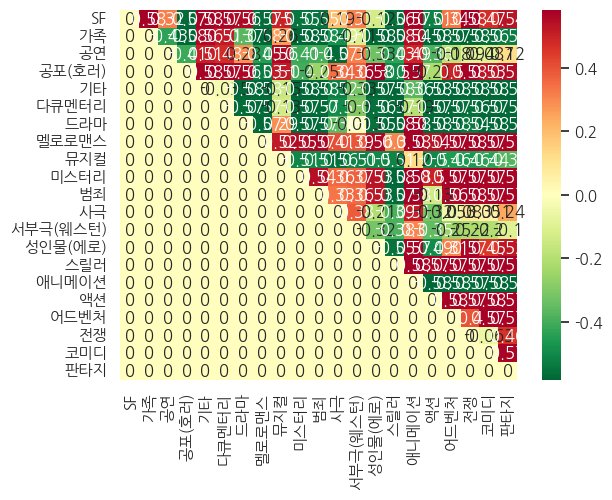

In [33]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax